# Подготовка данных и импорт библиотек
Импорт необходимых библиотек (numpy, pandas, sklearn, matplotlib) для работы с данными и построения моделей.

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Загрузка датасета
california = fetch_california_housing()

# Преобразование данных в DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['Price'] = california.target

# Вывод первых строк DataFrame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Загрузка и анализ набора данных
Загрузка датасета California Housing, преобразование в DataFrame, изучение структуры данных и базовая статистика.

In [2]:
# Изучение структуры данных
print(type(california))
print(california.keys())

# Вывод типов данных и их формы
print(type(california.data), type(california.target))
print(california.data.shape, california.target.shape)

# Вывод информации о DataFrame
data.info()

# Вывод описательной статистики
data.describe().round(2)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20640, 8) (20640,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


# Обучение линейной регрессии
Разделение данных на признаки и целевую переменную, создание и обучение модели линейной регрессии.

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
MedInc 0.4366932931343247
HouseAge 0.009435778033238227
AveRooms -0.10732204139090397
AveBedrms 0.6450656935198116
Population -3.976389421218599e-06
AveOccup -0.003786542654970847
Latitude -0.4213143775271443
Longitude -0.43451375467477765
Intercept: 
 -36.941920207184424
[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


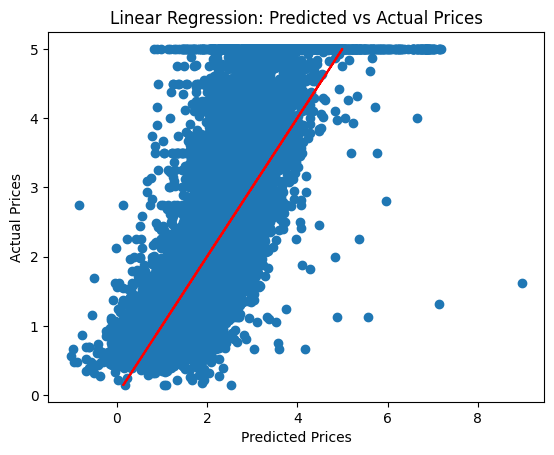

R^2 score:  0.606232685199805


In [3]:
# Обучение линейной регрессии

# Разделение данных на признаки и целевую переменную
y = data['Price']
X = data.drop('Price', axis=1)

# Создание и обучение модели линейной регрессии
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Вывод коэффициентов модели
print("Coefficients: \n", model.coef_)

# Вывод коэффициентов вместе с названиями соответствующих атрибутов
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

# Вывод свободного коэффициента
print("Intercept: \n", model.intercept_)

# Предсказание модели и вывод первых нескольких точек
y_pred = model.predict(X)
print(y_pred[:5])

# Вывод реальных значений целевой переменной для сравнения
print(y[:5])

# Построение графика, демонстрирующего связь между реальными и предсказанными значениями
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.show()

# Оценка качества модели с помощью коэффициента детерминации
print("R^2 score: ", model.score(X, y))

# Оценка качества линейной модели
Анализ коэффициентов модели, построение предсказаний, визуализация результатов и расчет метрик качества.

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
MedInc 0.4366932931343247
HouseAge 0.009435778033238227
AveRooms -0.10732204139090397
AveBedrms 0.6450656935198116
Population -3.976389421218599e-06
AveOccup -0.003786542654970847
Latitude -0.4213143775271443
Longitude -0.43451375467477765
Intercept: 
 -36.941920207184424
[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


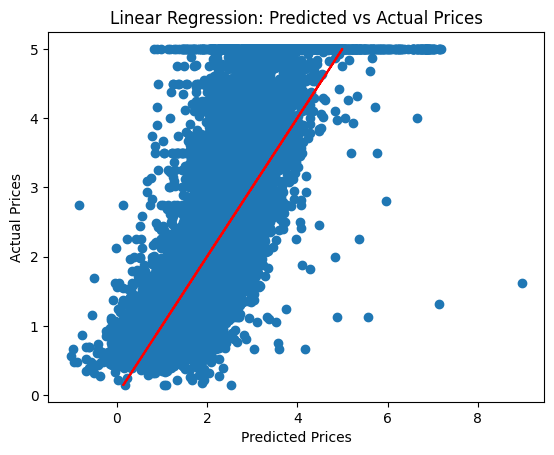

R^2 score:  0.606232685199805


In [4]:
# Оценка качества линейной модели

# Вывод коэффициентов модели
print("Coefficients: \n", model.coef_)

# Вывод коэффициентов вместе с названиями соответствующих атрибутов
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

# Вывод свободного коэффициента
print("Intercept: \n", model.intercept_)

# Предсказание модели и вывод первых нескольких точек
y_pred = model.predict(X)
print(y_pred[:5])

# Вывод реальных значений целевой переменной для сравнения
print(y[:5])

# Построение графика, демонстрирующего связь между реальными и предсказанными значениями
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.show()

# Оценка качества модели с помощью коэффициента детерминации
print("R^2 score: ", model.score(X, y))

# Полиномиальная регрессия
Создание полиномиальных признаков, обучение модели полиномиальной регрессии.

[2.20514613 4.95989229 2.38928724 2.39407966 2.08422065]


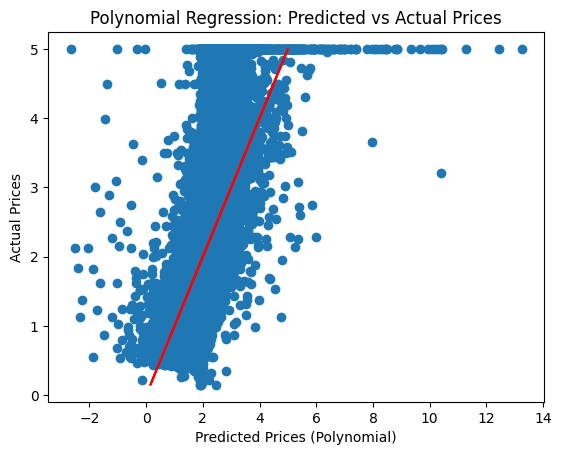

R^2 score (Polynomial):  0.366291810593269


In [5]:
# Полиномиальная регрессия

# Импортируем необходимые библиотеки для полиномиальной регрессии
from sklearn.preprocessing import PolynomialFeatures

# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Создание и обучение модели полиномиальной регрессии
polynomial_model = LinearRegression()
polynomial_model.fit(X_poly, y)

# Предсказание модели и вывод первых нескольких точек
y_pred_poly = polynomial_model.predict(X_poly)
print(y_pred_poly[:5])

# Построение графика, демонстрирующего связь между реальными и предсказанными значениями для полиномиальной регрессии
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')
plt.xlabel('Predicted Prices (Polynomial)')
plt.ylabel('Actual Prices')
plt.title('Polynomial Regression: Predicted vs Actual Prices')
plt.show()

# Оценка качества модели полиномиальной регрессии с помощью коэффициента детерминации
print("R^2 score (Polynomial): ", polynomial_model.score(X_poly, y))

# Оценка качества полиномиальной модели
Построение предсказаний полиномиальной модели, визуализация результатов и оценка качества.

[2.20514613 4.95989229 2.38928724 2.39407966 2.08422065]


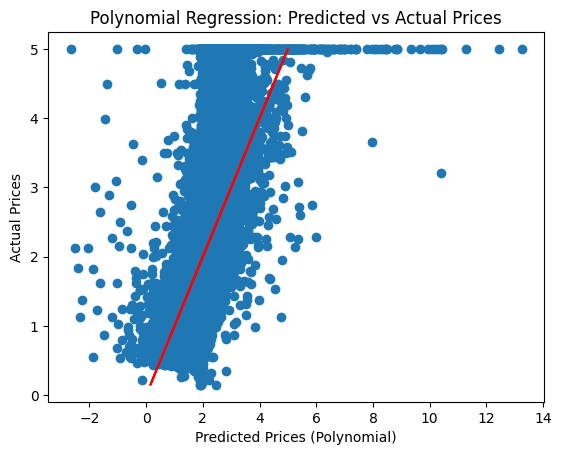

R^2 score (Polynomial):  0.366291810593269


In [6]:
# Построение предсказаний полиномиальной модели, визуализация результатов и оценка качества

# Импортируем необходимые библиотеки для полиномиальной регрессии
from sklearn.preprocessing import PolynomialFeatures

# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Создание и обучение модели полиномиальной регрессии
polynomial_model = LinearRegression()
polynomial_model.fit(X_poly, y)

# Предсказание модели и вывод первых нескольких точек
y_pred_poly = polynomial_model.predict(X_poly)
print(y_pred_poly[:5])

# Построение графика, демонстрирующего связь между реальными и предсказанными значениями для полиномиальной регрессии
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')
plt.xlabel('Predicted Prices (Polynomial)')
plt.ylabel('Actual Prices')
plt.title('Polynomial Regression: Predicted vs Actual Prices')
plt.show()

# Оценка качества модели полиномиальной регрессии с помощью коэффициента детерминации
print("R^2 score (Polynomial): ", polynomial_model.score(X_poly, y))

# Сравнение моделей
Сравнительный анализ результатов линейной и полиномиальной регрессии, выводы о качестве моделей.

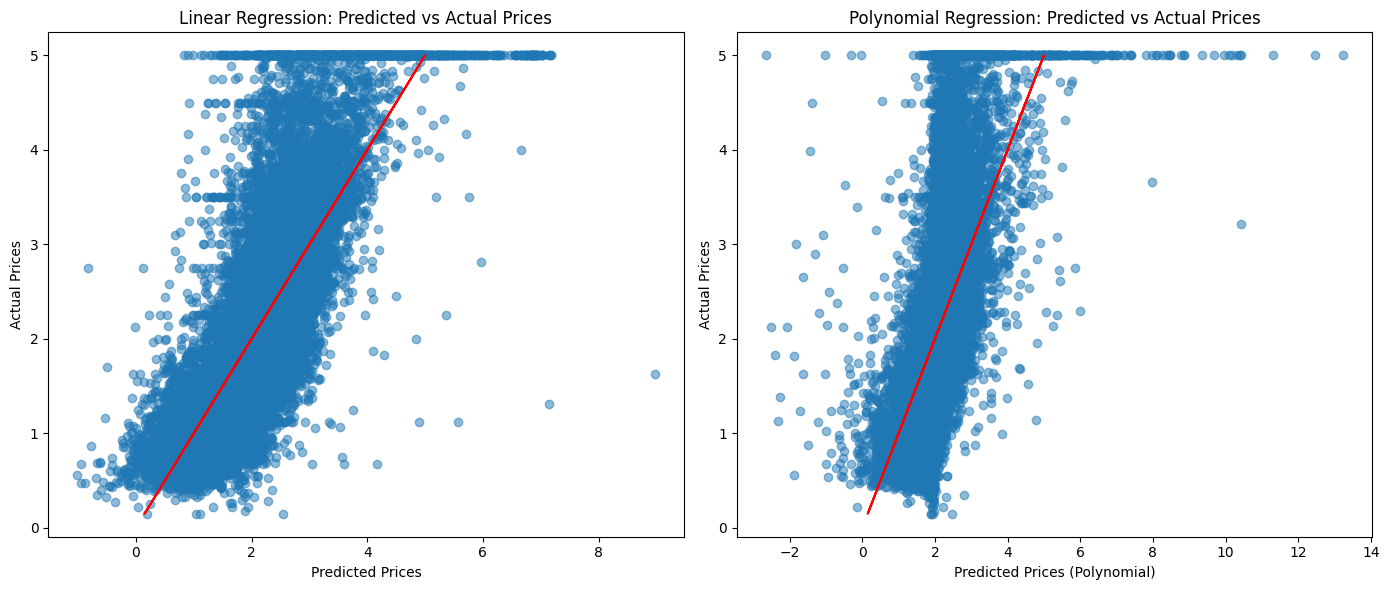

R^2 score (Linear):  0.606232685199805
R^2 score (Polynomial):  0.366291810593269
Линейная регрессия показывает лучшие результаты по сравнению с полиномиальной регрессией.


In [7]:
# Сравнение моделей

# Построение графиков для сравнения линейной и полиномиальной регрессии
plt.figure(figsize=(14, 6))

# График для линейной регрессии
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y, alpha=0.5)
plt.plot(y, y, c='r')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Linear Regression: Predicted vs Actual Prices')

# График для полиномиальной регрессии
plt.subplot(1, 2, 2)
plt.scatter(y_pred_poly, y, alpha=0.5)
plt.plot(y, y, c='r')
plt.xlabel('Predicted Prices (Polynomial)')
plt.ylabel('Actual Prices')
plt.title('Polynomial Regression: Predicted vs Actual Prices')

plt.tight_layout()
plt.show()

# Вывод коэффициентов детерминации для обеих моделей
print("R^2 score (Linear): ", model.score(X, y))
print("R^2 score (Polynomial): ", polynomial_model.score(X_poly, y))

# Выводы о качестве моделей
if polynomial_model.score(X_poly, y) > model.score(X, y):
    print("Полиномиальная регрессия показывает лучшие результаты по сравнению с линейной регрессией.")
else:
    print("Линейная регрессия показывает лучшие результаты по сравнению с полиномиальной регрессией.")